In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
f = open(r'C:\Users\Alex\MARGO\crypto_labs\lab2\lab2\var7.txt', 'r', encoding='utf8', errors='ignore')
text = f.read()
f.close()

визначення довжини ключа

d= [182, 186, 220, 197, 217, 219, 186, 203, 203, 370, 175, 216, 181, 205, 192, 202, 209, 195, 187, 194, 203, 176, 205, 219, 376]


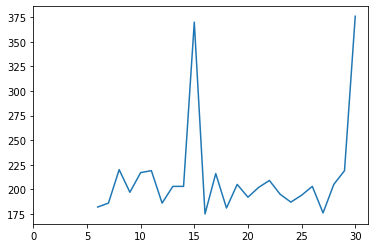

In [3]:
def find_r(y):
    d = []
    for r in range(6,31):
        d_r = 0
        for i in range(1, len(y)-r):
            if y[i] == y[i+r]:
                d_r += 1
        d.append(d_r)
    print("d=", d)
    return d


def plot_d(d):
    r = list(range (6,31))
    plt.plot(r,d)
    plt.xticks(np.arange(0, 31, 5.0))
    plt.show()

d = find_r(text)
plot_d(d)

r=15 #key length

In [4]:
def y_to_blocks(y):
    y_blocks = []
    for i in range(0, r):
        y_i = y[i:: r]
        y_blocks.append(y_i)
    return y_blocks     

ru_alph = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й','к', 'л', 'м', 'н', 'о', 'п',
           'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ','ы', 'ь', 'э', 'ю', 'я']

Y = y_to_blocks(text) #ciphertext divided into blocks of symbols with step r

def letter_freqs(y):
    fr = []
    for j in range(len(Y)):
        fr_j = []
        for i in range(0,32):
            fr_j.append(Y[j].count(ru_alph[i]))
        fr.append(fr_j)
    return fr

freqs = letter_freqs(Y) #freqs of letters of block

def find_most_freq(fr):
    max_let = []  #indexes of most frequent letters of the block
    for i in range(len(fr)): 
        max_let.append(fr[i].index(max(fr[i])))
    return max_let

most_freq = find_most_freq(freqs) #indexes of most frequent letters of the block
print("max_let_ind=",most_freq)

max_let_ind= [14, 30, 1, 18, 14, 21, 19, 16, 14, 30, 3, 22, 26, 14, 17]


визначення символів ключа прирівнюючи найчастіші літери в блоці та мові

In [5]:
# "o" is most frequent in russian. position:14
m = 32 
def find_key_letter(mas):
    k = []
    for i in range(len(mas)):
        k_i = (mas[i] - 14) % m
        k.append(k_i)
    return k

key_numbers_1 = find_key_letter(most_freq) #key letters`numbers
print("key 1:\n", key_numbers_1)

def num_to_letter(y):
    word = []
    for item in y:
        word.append(ru_alph[item])
    return word

key_word_1 = num_to_letter(key_numbers_1)
print(key_word_1)

key 1:
 [0, 16, 19, 4, 0, 7, 5, 2, 0, 16, 21, 8, 12, 0, 3]
['а', 'р', 'у', 'д', 'а', 'з', 'е', 'в', 'а', 'р', 'х', 'и', 'м', 'а', 'г']


визначення символів ключа за допомогою функції М_і(g)

In [6]:
ru_freqs = {'а': 0.08413309204466018, 'б': 0.018444537359456968, 'в': 0.040462673208464264, 'г': 0.01711178764854606, 
            'д': 0.02942828957254013, 'е': 0.07911241482488061,  'ж': 0.009113656111376064, 'з': 0.017559304095592126, 
            'и': 0.06170010518269777, 'й': 0.011478633539561108, 'к': 0.03969340223562231, 'л': 0.05009897626529559, 
            'м': 0.034354237033455935, 'н': 0.06501238019952048, 'о': 0.1144482481527697, 'п': 0.028178836718561154, 
            'р': 0.04283091718005841, 'с': 0.05246558696518518, 'т': 0.062276650094403106, 'у': 0.030447451116177884, 
            'ф': 0.0015924399119339897, 'х': 0.009015659809103203, 'ц': 0.0038561544944370764, 'ч': 0.015486682302521117, 
            'ш': 0.008515878667511613, 'щ': 0.002889257645344849, 'ъ': 0.00022865803863667545, 'ы': 0.019801786145936095, 
            'ь': 0.018248544754911247, 'э': 0.0031946794540952655, 'ю': 0.00484755041909752, 'я': 0.023942129916964466}

def M_i(n, g):  #function M_i(g)
    m_i = 0
    for i in range (r):
        for t in range(len(ru_alph)):
            let = ru_alph[t]
            z = freqs[n][(t+g) % m]
            m_i = m_i + ru_freqs.get(let) * z
    return m_i


def find_k_n(n): #meaning of n_th letter of the key
    m_values = []
    for g in range (m):
        m_i = M_i(n, g)
        m_values.append(m_i)
    k_n = m_values.index(max(m_values))
    return k_n

def find_key():
    k = []
    for j in range(r):
        k.append(find_k_n(j))
    return k

key_numbers_2 = find_key() #key letters`numbers
print("key 2:\n", key_numbers_2)

key_word_2 = num_to_letter(key_numbers_2)
print(key_word_2)

key 2:
 [0, 16, 19, 4, 0, 7, 14, 2, 0, 16, 21, 8, 12, 0, 3]
['а', 'р', 'у', 'д', 'а', 'з', 'о', 'в', 'а', 'р', 'х', 'и', 'м', 'а', 'г']


дешифрування тексту

In [7]:
ru_dict = {'а':0, 'б':1, 'в':2, 'г':3, 'д':4, 'е':5, 'ж':6, 'з':7, 'и':8, 'й':9,'к':10, 'л':11, 'м':12, 'н':13,
           'о':14, 'п':15, 'р':16, 'с':17, 'т':18, 'у':19, 'ф':20, 'х':21, 'ц':22, 'ч':23, 'ш':24, 'щ':25, 'ъ':26,
           'ы':27, 'ь':28, 'э':29, 'ю':30, 'я':31}

key = key_numbers_1

def decipher(y, k): #decipher the text using key
    x = []
    for i in range(len(y)):
        y_i = ru_dict.get(y[i])
        x_i = (y_i - k[i%r]) % m
        x.append(x_i)
    return x

X_numbers = decipher(text, key)
X = ''.join(num_to_letter(X_numbers)) #original text

print("KEY:", ''.join(key_word_1))
print("DECIPHERED TEXT:\n", X)

KEY: арудазевархимаг
DECIPHERED TEXT:
 прошлошятнадцатьднейиътарыйдомпостепонноначаложиватесороклетвнемниутонежилпонастоищемузаэтовремячнсменилодиннадяатьхозяевноникыоизнихневыдержсвалвподобноммеътебольшетрехмеъяцевкреоливанеъсасталидвенадцйтымимагполностеюпогрузилсявракотуонотрывалсяыолькозатемчтобдпоестьаотснаизкавлялсязаклятиомбессонницынодфякреолаэтоявноцепроходилобезнйказанноглазауногопокраснелиавокинабряклииотвссливанессавсячоскистараласьубодитьеговтомчтоомуследуетпрекрйтитьиздевательътванадорганизмчмихотьразоквысшатьсяпонастоящомуномагтолькоомрызалсязанималъяондвумяделамицеутомимописалмйгическуюкнигуичкутывалособнякхагическойзащитчйитоидругоетрековалоуймывремециакреолникакнехогрешитьчтодляцегоболеесрочношоэтомузанималсиобоимиделамипошеременносначалйонвсерьезбеспоуоилсяотомчтозаогодушойвотвотялитсяужасныйтротнопотомутихомищилсярешивчтотоыскореевсегодажонезнаетовоскребениистаринноголрагапокрайнеймореванессаизбавсласьотдомашнихюлопотбраунихубортнеизменносохщаняяпостноевырйжениелица

In [8]:
ru_dict = {'а':0, 'б':1, 'в':2, 'г':3, 'д':4, 'е':5, 'ж':6, 'з':7, 'и':8, 'й':9,'к':10, 'л':11, 'м':12, 'н':13,
           'о':14, 'п':15, 'р':16, 'с':17, 'т':18, 'у':19, 'ф':20, 'х':21, 'ц':22, 'ч':23, 'ш':24, 'щ':25, 'ъ':26,
           'ы':27, 'ь':28, 'э':29, 'ю':30, 'я':31}

key = key_numbers_2

def decipher(y, k): #decipher the text using key
    x = []
    for i in range(len(y)):
        y_i = ru_dict.get(y[i])
        x_i = (y_i - k[i%r]) % m
        x.append(x_i)
    return x

X_numbers = decipher(text, key)
X = ''.join(num_to_letter(X_numbers)) #original text

print("KEY:", ''.join(key_word_2))
print("ORIGINAL TEXT:\n", X)

KEY: арудазовархимаг
ORIGINAL TEXT:
 прошлопятнадцатьднейистарыйдомпостепенноначаложиватьсороклетвнемниктонежилпонастоящемузаэтовремяонсменилодиннадцатьхозяевнониктоизнихневыдерживалвподобномместебольшетрехмесяцевкреоливанессасталидвенадцатымимагполностьюпогрузилсявработуонотрывалсятолькозатемчтобыпоестьаотснаизбавлялсязаклятиембессонницынодлякреолаэтоявнонепроходилобезнаказанноглазаунегопокраснелиавекинабряклииотвисливанессавсяческистараласьубедитьеговтомчтоемуследуетпрекратитьиздевательстванадорганизмомихотьразоквыспатьсяпонастоящемуномагтолькоогрызалсязанималсяондвумяделаминеутомимописалмагическуюкнигуиокутывалособнякмагическойзащитойитоидругоетребовалоуймывремениакреолникакнемогрешитьчтодлянегоболеесрочнопоэтомузанималсяобоимиделамипопеременносначалаонвсерьезбеспокоилсяотомчтозаегодушойвотвотявитсяужасныйтройнопотомутихомирилсярешивчтототскореевсегодаженезнаетовоскрешениистаринноговрагапокрайнеймереванессаизбавиласьотдомашниххлопотбраунихубертнеизменносохраняяпостноевыражениелицауб

Decipher var 11

d= [202, 219, 195, 204, 202, 205, 264, 185, 236, 196, 210, 411, 223, 211, 210, 174, 267, 212, 206, 212, 222, 190, 208, 241, 193, 223, 211, 191, 372, 174]


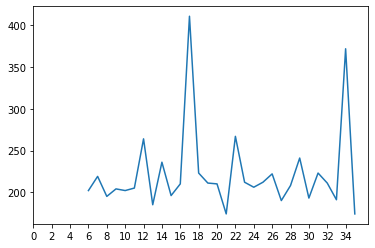

In [9]:
f1 = open(r'C:\Users\Alex\MARGO\crypto_labs\lab2\lab2\var11.txt', 'r', encoding='utf8', errors='ignore')
text1 = f1.read()
f1.close()

def find_r1(y):
    d = []
    for r in range(6,36):
        d_r = 0
        for i in range(1, len(y)-r):
            if y[i] == y[i+r]:
                d_r += 1
        d.append(d_r)
    print("d=", d)
    return d


def plot_d1(d):
    r = list(range (6,36))
    plt.plot(r,d)
    plt.xticks(np.arange(0, 36, 2.0))
    plt.show()
    
d = find_r1(text1)
plot_d1(d)

In [10]:
r = 17  # found from plot

Y = y_to_blocks(text1) #ciphertext divided into blocks of symbols with step r
freqs = letter_freqs(Y) #freqs of letters of block

most_freq = find_most_freq(freqs) #indexes of most frequent letters of the block
print("max_let_ind=", most_freq)


### визначення символів ключа прирівнюючи найчастіші літери в мові
# "o" is most frequent in russian. position:14
m = 32

key_numbers_1 = find_key_letter(most_freq) #key letters`numbers
print("key 1:\n", key_numbers_1)

key_word_1 = num_to_letter(key_numbers_1)
print(key_word_1)


### визначення символів ключа за допомогою функції М_і(g)

key_numbers_2 = find_key() #key letters`numbers
print("key 2:\n", key_numbers_2)

key_word_2 = num_to_letter(key_numbers_2)
print(key_word_2)

ru_dict = {'а':0, 'б':1, 'в':2, 'г':3, 'д':4, 'е':5, 'ж':6, 'з':7, 'и':8, 'й':9,'к':10, 'л':11, 'м':12, 'н':13,
           'о':14, 'п':15, 'р':16, 'с':17, 'т':18, 'у':19, 'ф':20, 'х':21, 'ц':22, 'ч':23, 'ш':24, 'щ':25, 'ъ':26,
           'ы':27, 'ь':28, 'э':29, 'ю':30, 'я':31}

def decipher1(y, k): #decipher the text using key
    x = []
    for i in range(len(y)):
        y_i = ru_dict.get(y[i])
        x_i = (y_i - k[i%r]) % m
        x.append(x_i)
    return x

key = key_numbers_2

X_numbers = decipher1(text1, key)
X = ''.join(num_to_letter(X_numbers)) #original text

print("KEY:", ''.join(key_word_2))
print("ORIGINAL TEXT:\n", X)

max_let_ind= [16, 19, 27, 19, 4, 22, 14, 27, 31, 24, 22, 23, 24, 1, 20, 10, 4]
key 1:
 [2, 5, 13, 5, 22, 8, 0, 13, 17, 10, 8, 9, 10, 19, 6, 28, 22]
['в', 'е', 'н', 'е', 'ц', 'и', 'а', 'н', 'с', 'к', 'и', 'й', 'к', 'у', 'ж', 'ь', 'ц']
key 2:
 [2, 5, 13, 5, 22, 8, 0, 13, 17, 10, 8, 9, 10, 19, 15, 5, 22]
['в', 'е', 'н', 'е', 'ц', 'и', 'а', 'н', 'с', 'к', 'и', 'й', 'к', 'у', 'п', 'е', 'ц']
KEY: венецианскийкупец
ORIGINAL TEXT:
 антонионезнаюотчегоятакпечаленмнеэтовтягостьвамяслышутоженогдеягрустьпоймалнашелильдобылчтосоставляетчтородитеехотелбызнатьбессмысленнаягрустьмоявиноючтосамогосебяузнатьмнетрудносалариновыдухоммечетесьпоокеанугдевашивеличавыесудакакбогатеиивельможиводильпышнаяпроцессияморскаяспрезреньемсмотрятнаторговцевмелкихчтокланяютсянизкоимспочтеньемкогдаонилетятнатканыхкрыльяхсаланиоповерьтееслибятакрисковалпочтивсечувствабылибтаммоисмоейнадеждойябыпостоянносрывалтравучтобзнатьоткудаветерискалнакартахгаваниибухтылюбойпредметчтомогбынеудачумнепредвещатьменябынесомненновгрустьпо

In [11]:
ru_dict = {'а':0, 'б':1, 'в':2, 'г':3, 'д':4, 'е':5, 'ж':6, 'з':7, 'и':8, 'й':9,'к':10, 'л':11, 'м':12, 'н':13,
           'о':14, 'п':15, 'р':16, 'с':17, 'т':18, 'у':19, 'ф':20, 'х':21, 'ц':22, 'ч':23, 'ш':24, 'щ':25, 'ъ':26,
           'ы':27, 'ь':28, 'э':29, 'ю':30, 'я':31}

def decipher1(y, k): #decipher the text using key
    x = []
    for i in range(len(y)):
        y_i = ru_dict.get(y[i])
        x_i = (y_i - k[i%r]) % m
        x.append(x_i)
    return x

key = key_numbers_1

X_numbers = decipher1(text1, key)
X = ''.join(num_to_letter(X_numbers)) #original text

print("KEY:", ''.join(key_word_1))
print("ORIGINAL TEXT:\n", X)

KEY: венецианскийкужьц
ORIGINAL TEXT:
 антонионезнаюоыаегоятакпечаленмцоэтовтягостьвамяъфышутоженогдеягрьътьпоймалнашелиленобылчтосоставляоычтородитеехотелкдзнатьбессмысленцйягрустьмоявиноюаыосамогосебяузнаыемнетрудносаларицчвыдухоммечетесьшчокеанугдевашивефсчавыесудакакбогйыеиивельможиводифепышнаяпроцессияхчрскаяспрезреньехъмотрятнаторговцолмелкихчтокланяюыъянизкоимспочтенеомкогдаонилетятнйыканыхкрыльяхсалйциоповерьтееслибиыакрисковалпочтилъечувствабылибтаххоисмоейнадеждойикыпостоянносрывафыравучтобзнатьотуьдаветерискалнакйщтахгаваниибухтыфзбойпредметчтомомкынеудачумнепредлощатьменябынесомцонновгрустьповермйлсалариностудямчтсупдыханьемявлиючрадкебыдрожалотхдсличтоможетвмороьраганнаделатьнехчгбывидетьячасовшосочныхневспомнилбиомеляхиорифахпщодставилбыкораблелпескезавязшимглйлусклонившимнижеаомбокачтобцеловаыесвоюмогилувцерклссмотрянакамниздйциясвятогокакмогкдяневспомнитьскафчпасныхчтохрупкитхойкорабльедватофунуввсепряностирйъсыпалибывводуивчфныоблеклибвмоишофканусловомчтомоокогатствост